In [1]:
import os
import numpy as np
import tifffile as tf
import pylab as pl
from pipeline.python.utils import natural_keys
from scipy import ndimage

In [2]:
%matplotlib notebook

In [55]:
img_path = '/home/juliana/Desktop/median3D_sigma2.tif'
img = tf.imread(img_path)


In [3]:
rootdir = '/mnt/odyssey'
animalid = 'CE077'
session = '20180521'
acquisition = 'FOV2_zoom1x'
run = 'gratings_run1'
run_dir = os.path.join(rootdir, animalid, session, acquisition, run)

tsource = 'processed001'
ttype = 'mcorrected'

tsource = [s for s in os.listdir(os.path.join(run_dir, 'processed')) if tsource in s][0]
ttype = [s for s in os.listdir(os.path.join(run_dir, 'processed', tsource)) if ttype in s and len(s.split('_'))==2][0]

tiff_sourcedir = os.path.join(run_dir, 'processed', tsource, ttype)

assert os.path.exists(tiff_sourcedir), "DIR does not exist!"

tiffs = sorted([t for t in os.listdir(tiff_sourcedir) if t.endswith('tif')], key=natural_keys)
print "Found %i tiffs." % len(tiffs)

Found 8 tiffs.


In [4]:
tiff_path = os.path.join(tiff_sourcedir, tiffs[3])
print tiff_path

/mnt/odyssey/CE077/20180521/FOV2_zoom1x/gratings_run1/processed/processed001_4171f2/mcorrected_1a825c/FOV2_zoom1x_gratings_Slice01_Channel01_File004.tif


In [5]:
with tf.TiffFile(tiff_path) as tif:
    image = tif.asarray()#numpy array
print image.shape


(2860, 512, 512)


In [6]:
from scipy import ndimage

In [ ]:

# Gaussian blur
med_filt = ndimage.median_filter(image, size=4)
print med_filt.shape


In [81]:
# std:
std_img = np.std(med_filt, axis=0).astype(image.dtype)
print std_img.shape

std_orig = np.std(image, axis=0).astype(image.dtype)

tf.imsave(os.path.join(run_dir, 'std_median5.tif'), std_img)
tf.imsave(os.path.join(run_dir, 'std_orig.tif'), std_orig)


(512, 512)


In [82]:
std_orig = np.std(image, axis=0).astype(image.dtype)


<IPython.core.display.Javascript object>


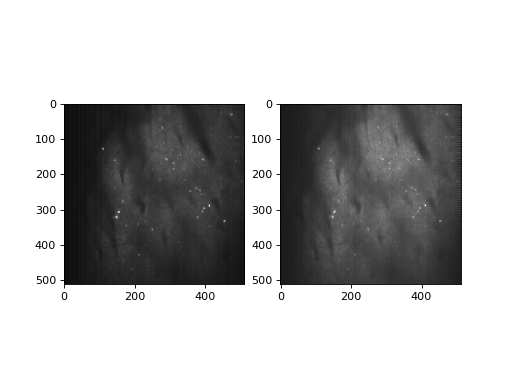

In [83]:
fig, axes = pl.subplots(1,2,) #pl.figure()
axes[0].imshow(std_img, cmap='gray')
axes[1].imshow(std_orig, cmap='gray')

In [84]:
tf.imsave('/home/juliana/Desktop/median_std.tif', std_img)

In [85]:
tf.imsave('/home/juliana/Desktop/std_orig.tif', std_orig)

In [ ]:
hist_kernel = 2

# CLAHE
image_processed = equalize_adapthist(image_gaussian, kernel_size=hist_kernel)
pl.figure()
pl.imshow(image_processed, cmap='gray')

<IPython.core.display.Javascript object>


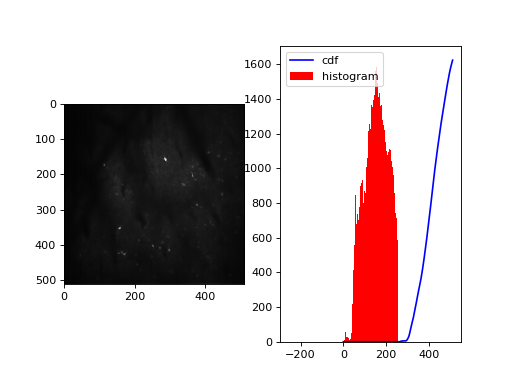

In [39]:
fig, axes = pl.subplots(1,2)
axes[0].imshow(img, cmap='gray')
#pl.axis('off')

hist,bins = np.histogram(img.flatten(),  (2**8)*2, [-(2**8), (2**8)-1])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axes[1].plot(cdf_normalized, color = 'b')
axes[1].hist(img.flatten(), (2**8)*2, [-(2**8), (2**8) -1], color = 'r')
#axes[1].set(xlim=[-(2**8),(2**8)-1])
axes[1].legend(('cdf','histogram'), loc = 'upper left')


In [44]:
import cv2

In [53]:
im